In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traja

In [2]:
data = np.load('newrawdata.npy',allow_pickle=True)
flynum = data[1].shape[0] #384

In [3]:
food_type = data[1]
starve_period = data[2]
meal_vol = data[15]

xcm = data[3] #x center of mass location #(384,)
ycm = data[5]

start_time = data[12]
t_offset = 1.0/3.0 
t = data[16] - t_offset

### ? seconds before 1st meal

In [4]:
# ? seconds before 1st meal -> 1st meal
first_meal_start = np.array([start_time[i][0] for i in range(flynum)])

# get that trajectory
x_traj = []
y_traj = []
for i in range(flynum):
    idx = (t[i] >= (first_meal_start[i] - 5)) & (t[i] <= first_meal_start[i])   #5 seconds before 1st meal
    x_traj.append(xcm[i][idx])
    y_traj.append(ycm[i][idx])
x_traj = np.array(x_traj,dtype=object)
y_traj = np.array(y_traj,dtype=object)

def traj(flyno):
    return np.vstack((x_traj[flyno], y_traj[flyno]))

### Finding Conditions

In [5]:
#By Foodtype
mM1000 = np.where(food_type == '1000mM')[0] #(90,)
mM100 = np.where(food_type == '100mM')[0]
mM10 = np.where(food_type == '10mM')[0]
mM1 = np.where(food_type == '1mM')[0]  #(48,)
mMwater = np.where(food_type == 'water')[0]

In [6]:
#By starvetime
st_0 = np.where(starve_period == '0')[0]
st_8 = np.where(starve_period == '8')[0]
st_16 = np.where(starve_period == '16')[0]
st_24 = np.where(starve_period == '24')[0]
st_32 = np.where(starve_period == '32')[0]

In [7]:
#Volume of first bout 
vol_first = np.array([meal_vol[i][0] for i in range(flynum)])

### Multiple Trajectories

In [8]:
from traja import TrajaCollection

In [9]:
def create_df(flyno):
    x_fly = traj(flyno)[0]
    y_fly = traj(flyno)[1]
    d = {'x': x_fly, 'y': y_fly}
    df = pd.DataFrame(data=d)
    df = traja.TrajaDataFrame(df)
    return df

In [10]:
# Create a dictionary of DataFrames, with 'id' as key.
keys = np.arange(flynum)
all_values = [] #create values - i.e. df for each fly
for n in range(flynum):
    all_values.append(create_df(n))

df_all = {}
for i in range(flynum):
    df_all[i] = all_values[i]

# Create a TrajaCollection df (x,y,id)
trjs = TrajaCollection(df_all)

### Calculated Angles with Traja

In [11]:
def average_turns(condition):
    "e.g. condition = st_0"
    avg_turns = []
    for j in range(len(condition)):
        turns = traja.calc_angle(trjs[trjs['id'] == condition[j]])
        if turns.shape == (150,):
            avg_turns.append(turns)
    return  np.average(np.array(avg_turns), axis = 0)

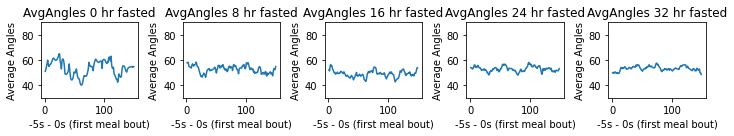

In [12]:
plt.figure(figsize=(10,2))
all_starv = [st_0, st_8, st_16, st_24, st_32]
for j in range(len((all_starv))):
    plt.subplot(1,5,j+1)
    plt.plot(average_turns(all_starv[j]))
    plt.title('AvgAngles ' + str(0+j*8) + ' hr fasted')
    plt.ylabel('Average Angles')
    plt.ylim(30,90)
    plt.xlabel('-5s - 0s (first meal bout)')
    plt.tight_layout()

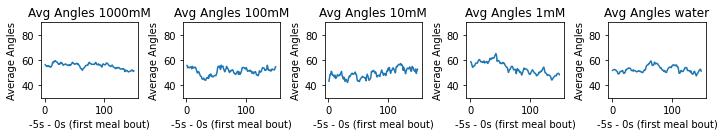

In [13]:
all_conc = [mM1000, mM100, mM10, mM1, mMwater]
fortitle = ['1000mM', '100mM','10mM','1mM','water']
plt.figure(figsize=(10,2))

for j in range(len((all_conc))):
    plt.subplot(1,5,j+1)
    plt.plot(average_turns(all_conc[j]))
    plt.title('Avg Angles ' + str(fortitle[j]))
    plt.ylabel('Average Angles')
    plt.ylim(30,90)
    plt.xlabel('-5s - 0s (first meal bout)')
    plt.tight_layout()

### Calculated Headings with Traja

In [20]:
#traja.calc_heading(trjs)

In [21]:
def average_headings(condition):
    "e.g. condition = st_0"
    avg_heads = []
    for j in range(len(condition)):
        heads = traja.calc_heading(trjs[trjs['id'] == condition[j]])
        
        if heads.shape == (150,):
            avg_heads.append(heads)
    return  np.average(np.array(avg_heads), axis = 0)

In [22]:
def average_headings(condition):
    "e.g. condition = st_0"
    avg_head = []
    for i in range(len(condition)):
        he = np.array(trjs[trjs['id'] == condition[i]]['heading'])
        if he.shape == (150,):
            avg_head.append(he)
    return np.average(np.array(avg_head), axis = 0)

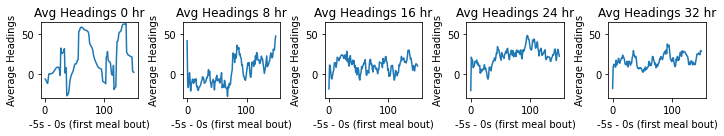

In [23]:
plt.figure(figsize=(10,2))
all_starv = [st_0, st_8, st_16, st_24, st_32]
for j in range(len((all_starv))):
    plt.subplot(1,5,j+1)
    plt.plot(average_headings(all_starv[j]))
    plt.title('Avg Headings ' + str(0+j*8) + ' hr')
    plt.ylabel('Average Headings')
    plt.ylim(-30,65)
    plt.xlabel('-5s - 0s (first meal bout)')
    plt.tight_layout()

## Thoroughness Index

In [24]:
# ? seconds before 1st meal -> 1st meal
first_meal_start = np.array([start_time[i][0] for i in range(flynum)])

# get that trajectory
x_traj = []
y_traj = []
for i in range(flynum):
    idx = (t[i] >= (first_meal_start[i] - 10)) & (t[i] <= first_meal_start[i])   #10 seconds before 1st meal
    x_traj.append(xcm[i][idx])
    y_traj.append(ycm[i][idx])
x_traj = np.array(x_traj,dtype=object)
y_traj = np.array(y_traj,dtype=object)

def traj(flyno):
    return np.vstack((x_traj[flyno], y_traj[flyno])).T

In [25]:
def Length(flyno):
    flytraj = traj(flyno)
    lengths = np.sqrt(np.sum(np.diff(flytraj, axis=0)**2, axis=1)) # Total length: L
    return np.sum(lengths)  

In [26]:
def radius(flyno):
    flytraj = traj(flyno)    
    from scipy import spatial
    cand = flytraj[spatial.ConvexHull(flytraj).vertices]
    dist_mat = spatial.distance_matrix(cand, cand)
    i, j = np.unravel_index(dist_mat.argmax(), dist_mat.shape)
    #print(cand[i], cand[j])
    import math
    dist = math.hypot(cand[j][0] - cand[i][0], cand[j][1] - cand[i][1])
    r = dist/2
    return r

In [27]:
w = 1/10 #assume width of flies' body = 1mm

def thoroughnessind(L,r,w = 1/10):
    return 1- np.exp(((-4)*L*w)/(np.pi* (r**2)))

def all_t(cond):
    "cond = st_0"
    t_all = []
    for n in cond:
        L = Length(n)
        r = radius(n)
        t = thoroughnessind(L,r,w = 1/10)
        #print('fly: ' + str(n) + ' t: '+ str(t))
        t_all.append(t)
    return np.array(t_all)

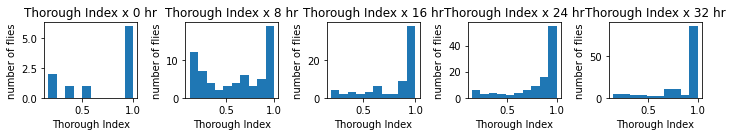

In [28]:
plt.figure(figsize=(10,2))
all_starv = [st_0, st_8, st_16, st_24, st_32]
for j in range(len((all_starv))):
    plt.subplot(1,5,j+1)
    plt.hist(all_t(all_starv[j]))
    plt.title('Thorough Index x ' + str(0+j*8) + ' hr')
    plt.ylabel('number of flies')
    plt.xlabel('Thorough Index')
    plt.tight_layout()

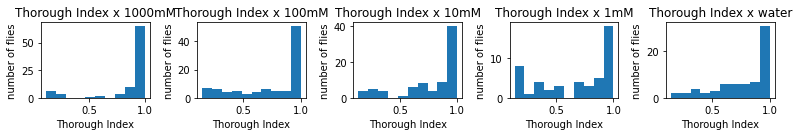

In [29]:
plt.figure(figsize=(11,2))
all_conc = [mM1000, mM100, mM10, mM1, mMwater]
fortitle = ['1000mM', '100mM','10mM','1mM','water']
for j in range(len((all_conc))):
    plt.subplot(1,5,j+1)
    plt.hist(all_t(all_conc[j]))
    plt.title('Thorough Index x ' + str(fortitle[j]))
    plt.ylabel('number of flies')
    plt.xlabel('Thorough Index')
    plt.tight_layout()

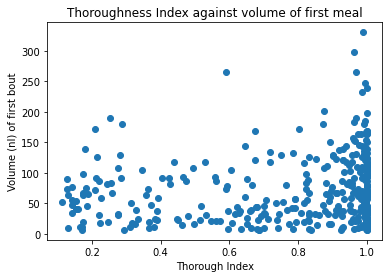

In [30]:
allflies_tind = all_t(np.arange(flynum)) #get thoroughness index for all individual 384 flies

plt.scatter(allflies_tind, vol_first)
plt.ylabel('Volume (nl) of first bout')
plt.xlabel('Thorough Index')
plt.title('Thoroughness Index against volume of first meal')
plt.show()

## Finding Turning Points of Trajectory
https://www.gakhov.com/articles/find-turning-points-for-a-trajectory-in-python.html

In [31]:
trajectory = np.vstack((xcm[0], ycm[0]))

from rdp import rdp
def angle(directions):
    """Return the angle between vectors
    """
    vec2 = directions[1:]
    vec1 = directions[:-1]

    norm1 = np.sqrt((vec1 ** 2).sum(axis=1))
    norm2 = np.sqrt((vec2 ** 2).sum(axis=1))
    cos = (vec1 * vec2).sum(axis=1) / (norm1 * norm2)   
    return np.arccos(cos)


# Build simplified (approximated) trajectory
# using RDP algorithm.
simplified_trajectory = rdp(trajectory, epsilon=200)
sx, sy = simplified_trajectory  #(2,384)

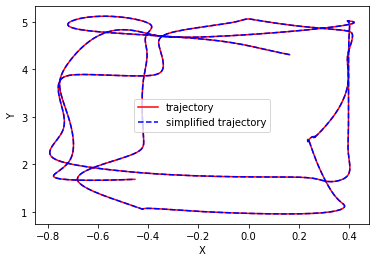

In [32]:
# Visualize trajectory and its simplified version.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xcm[0][1000:2000], ycm[0][1000:2000], 'r-', label='trajectory')
ax.plot(sx[1000:2000], sy[1000:2000], 'b--', label='simplified trajectory')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(loc='best')

Text(0.5, 1.0, 'Trajectory of Fly 1')

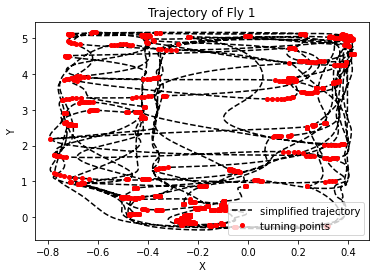

In [33]:
# Define a minimum angle to treat change in direction
# as significant (valuable turning point).
min_angle = np.pi / 30

# Compute the direction vectors on the simplified_trajectory.
directions = np.diff(simplified_trajectory.T, axis=0)
theta = angle(directions)

# Select the index of the points with the greatest theta.
# Large theta is associated with greatest change in direction.
idx = np.where(theta > min_angle)[0] + 1

# Visualize valuable turning points on the simplified trjectory.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sx, sy, 'k--', label='simplified trajectory')
ax.plot(sx[idx], sy[idx], 'ro', markersize = 4, label='turning points')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(loc='best')
ax.set_title('Trajectory of Fly 1')